Otsu 方法是一種自動選擇影像二值化閾值的技術，它能夠將影像分為前景和背景。這種方法是通過最大化類間方差（即背景和前景之間的區別）來選擇最佳閾值，從而達到最佳的影像分割效果。

以下是 Otsu 方法的基本步驟：

1. 計算影像的直方圖。
2. 計算影像的總像素數和每個像素的灰階值的總和。
3. 遍歷所有可能的閾值，對每個閾值計算前景和背景的均值及方差。
4. 根據這些均值和方差計算類間方差。
5. 選擇使類間方差最大的閾值作為最佳閾值。

以下是一段可以在 Jupyter Notebook 中執行的 Python 程式碼，演示如何使用 OpenCV 庫來實現 Otsu 方法：


在這段程式碼中：
- `cv2.imread` 用來讀取影像，`cv2.IMREAD_GRAYSCALE` 參數將影像讀取為灰階模式。
- `cv2.threshold` 函數與 `cv2.THRESH_BINARY + cv2.THRESH_OTSU` 標誌一起使用，實現 Otsu 二值化。
- `matplotlib` 用來顯示原始影像和二值化後的影像。

請確保將 `'path_to_image.jpg'` 替換為你自己的影像檔案路徑。

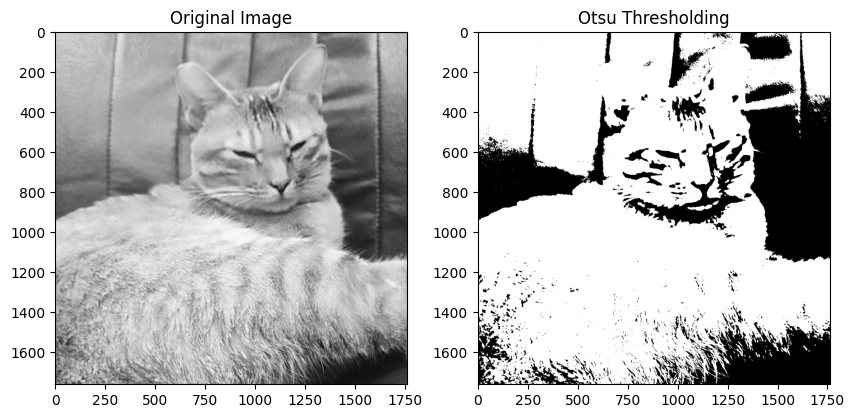

Optimal threshold value: 139.0


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取影像
image = cv2.imread(r'F:\Code\Digtal-Image-Processing\Code\Resources\Data\LAB_CAT2.jpg', cv2.IMREAD_GRAYSCALE)

# 使用 Otsu 方法進行二值化
# cv2.threshold 函數的第三個參數為閾值，第四個參數為二值化方法
ret, thresh_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 顯示結果
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Otsu Thresholding')
plt.imshow(thresh_otsu, cmap='gray')

plt.show()

print(f"Optimal threshold value: {ret}")

Kapur 方法是一種用於影像二值化的技術，基於最大化影像的熵。這種方法通過尋找使得影像的總熵最大的閾值來達到最佳的影像分割效果。

熵（Entropy）是測量影像資訊量的一種指標。Kapur 方法的目標是選擇一個閾值，使得前景和背景的熵之和最大化。這樣的閾值能夠提供最佳的分割效果，讓前景和背景之間的區別更加明顯。

以下是一段可以在 Jupyter Notebook 中執行的 Python 程式碼，演示如何使用 Kapur 方法進行影像二值化。這段程式碼使用 OpenCV 和 NumPy 庫來實現這一方法：



在這段程式碼中：
- `kapur_threshold` 函數計算每個可能閾值的熵，並選擇使總熵最大的閾值作為最佳閾值。
- `cv2.threshold` 用來對影像進行二值化處理。
- `matplotlib` 用來顯示原始影像和二值化後的影像。

請確保將 `'path_to_image.jpg'` 替換為你自己的影像檔案路徑。

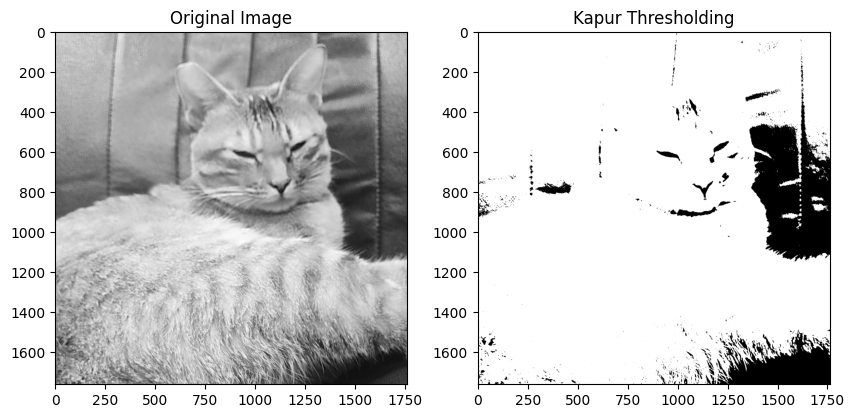

Optimal threshold value: 88


In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def kapur_threshold(image):
    # 計算影像的直方圖
    hist, bin_edges = np.histogram(image.flatten(), bins=256, range=[0, 256])
    
    # 總像素數
    total_pixels = image.size
    
    # 累積概率分佈
    cumulative_sum = np.cumsum(hist)
    
    # 累積均值
    cumulative_mean = np.cumsum(hist * np.arange(256)) / cumulative_sum
    
    # 總均值
    total_mean = cumulative_mean[-1]
    
    # 初始最大熵
    max_entropy = 0
    optimal_threshold = 0
    
    # 計算每個可能閾值的熵
    for t in range(1, 256):
        w1 = cumulative_sum[t] / total_pixels
        w2 = 1 - w1
        
        if w1 == 0 or w2 == 0:
            continue
        
        mu1 = cumulative_mean[t] / cumulative_sum[t]
        mu2 = (total_mean - mu1 * w1) / w2
        
        entropy1 = -np.sum((hist[:t] / cumulative_sum[t] + 1e-10) * np.log(hist[:t] / cumulative_sum[t] + 1e-10))
        entropy2 = -np.sum((hist[t:] / cumulative_sum[-1] + 1e-10) * np.log(hist[t:] / cumulative_sum[-1] + 1e-10))
        
        total_entropy = entropy1 + entropy2
        
        if total_entropy > max_entropy:
            max_entropy = total_entropy
            optimal_threshold = t
    
    return optimal_threshold

# 讀取影像
image = cv2.imread(r'F:\Code\Digtal-Image-Processing\Code\Resources\Data\LAB_CAT2.jpg', cv2.IMREAD_GRAYSCALE)

# 計算最佳閾值
threshold = kapur_threshold(image)

# 使用最佳閾值進行二值化
_, thresh_kapur = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)

# 顯示結果
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Kapur Thresholding')
plt.imshow(thresh_kapur, cmap='gray')

plt.show()

print(f"Optimal threshold value: {threshold}")


動差守恆式（Moments Preserving）是一種用於影像二值化的技術，基於保持影像統計特徵的原理來選擇最佳閾值。這種方法利用影像的動差（如均值和方差）來確定最佳的分割閾值。

動差守恆式的方法通常包括以下步驟：

1. 計算影像的灰階直方圖。
2. 計算影像的總像素數和每個像素的灰階值的總和。
3. 遍歷所有可能的閾值，對每個閾值計算前景和背景的均值和方差。
4. 根據這些均值和方差選擇使得前景和背景之間動差（如均值）的差異最小的閾值。

以下是一段可以在 Jupyter Notebook 中執行的 Python 程式碼，演示如何使用動差守恆式的方法進行影像二值化：

在這段程式碼中：
- `moments_preserving_threshold` 函數計算每個可能閾值的均值差異，並選擇使均值差異最小的閾值作為最佳閾值。
- `cv2.threshold` 用來對影像進行二值化處理。
- `matplotlib` 用來顯示原始影像和二值化後的影像。

請確保將 `'path_to_image.jpg'` 替換為你自己的影像檔案路徑。

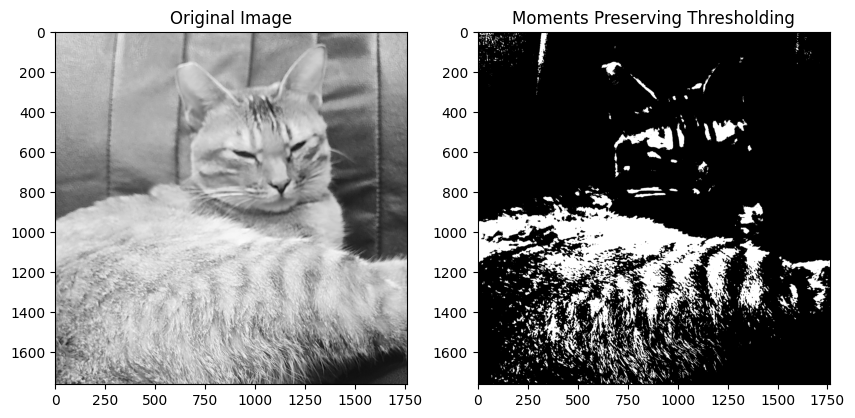

Optimal threshold value: 207


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def moments_preserving_threshold(image):
    # 計算影像的直方圖
    hist, bin_edges = np.histogram(image.flatten(), bins=256, range=[0, 256])
    
    # 總像素數
    total_pixels = image.size
    
    # 計算影像的總均值
    total_mean = np.sum(hist * np.arange(256)) / total_pixels
    
    best_threshold = 0
    min_diff = float('inf')
    
    # 遍歷所有可能的閾值
    for t in range(1, 256):
        # 計算前景和背景的累積直方圖
        w1 = np.sum(hist[:t]) / total_pixels
        w2 = np.sum(hist[t:]) / total_pixels
        
        if w1 == 0 or w2 == 0:
            continue
        
        # 計算前景和背景的均值
        mu1 = np.sum(hist[:t] * np.arange(t)) / np.sum(hist[:t])
        mu2 = np.sum(hist[t:] * np.arange(t, 256)) / np.sum(hist[t:])
        
        # 計算均值的差異
        diff = abs(mu1 - mu2)
        
        # 更新最佳閾值
        if diff < min_diff:
            min_diff = diff
            best_threshold = t
    
    return best_threshold

# 讀取影像
image = cv2.imread(r'F:\Code\Digtal-Image-Processing\Code\Resources\Data\LAB_CAT2.jpg', cv2.IMREAD_GRAYSCALE)

# 計算最佳閾值
threshold = moments_preserving_threshold(image)

# 使用最佳閾值進行二值化
_, thresh_moments = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)

# 顯示結果
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Moments Preserving Thresholding')
plt.imshow(thresh_moments, cmap='gray')

plt.show()

print(f"Optimal threshold value: {threshold}")

In [4]:
# 讀取圖像
image = cv2.imread(r'F:\Code\Digtal-Image-Processing\Code\Resources\Data\LAB_CAT2.jpg', cv2.IMREAD_GRAYSCALE)
type(image)

numpy.ndarray

In [5]:
import sys
import os

# 將父目錄加入到模組搜索路徑中
sys.path.append(os.path.abspath(os.path.join('..')))

Histogram values: [    42     76     63    136    164    632   3476  13520   6576   7382
   6616   3783   6424   5681   9270   6939  11153   8166  13896   9378
  15661  15176   9974  15926  12145  19199  13507  19789  13014  19797
  17910  11551  17707  11996  19265  14383  24076  17121  25466  16895
  25363  25032  16391  26244  18208  28340  19940  31302  20966  30758
  30965  21233  33664  24318  38815  27868  44905  31844  50167  35457
  57426  63744  45493  72027  50427  83684  63807 110337  71817 102140
  98262  62123  88019  56513  84817  56502  84650  55622  84325  56345
  87531  85460  55380  78118  46781  61827  34671  46859  27292  33069
  25359  12297  14742   7209   8079   4100   4455    746    362     41]
Bin edges: [  0.     2.55   5.1    7.65  10.2   12.75  15.3   17.85  20.4   22.95
  25.5   28.05  30.6   33.15  35.7   38.25  40.8   43.35  45.9   48.45
  51.    53.55  56.1   58.65  61.2   63.75  66.3   68.85  71.4   73.95
  76.5   79.05  81.6   84.15  86.7   89.25  91.

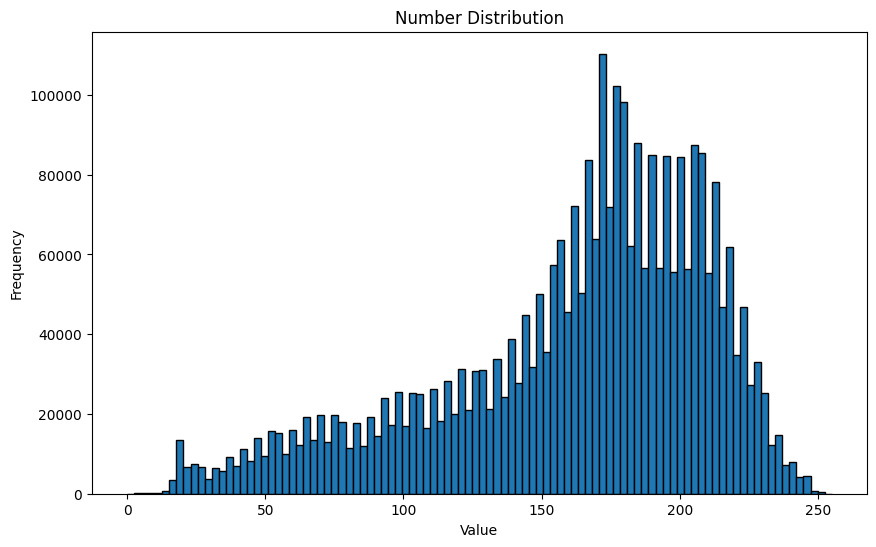

In [7]:
import utils
import utils.helper_function

utils.helper_function.matrix_values_distribution(image, bins=100)

Pairwise Nearest Neighbor (PNN) 方法是基於最近鄰的影像分割技術。PNN 方法將影像分割為不同的群集（clusters），並根據群集之間的相似性進行合併。下面是 PNN 方法的具體步驟和算法：

### PNN 方法步驟

1. **初始化群集**：每個節點（或像素）初始為一個獨立的群集。每個群集包含其所對應的灰階值及其頻次。

2. **計算群集之間的平方誤差（Square Error）**：
   - 計算群集之間的距離 `d(C_i, C_j)`，距離的量度可以使用平方誤差度量：
     \[
     d(C_i, C_j) = \frac{\| \bar{X_i} - \bar{X_j} \|^2}{n_i \cdot n_j}
     \]
     其中，\(\bar{X_i}\) 和 \(\bar{X_j}\) 是群集 \(C_i\) 和 \(C_j\) 的均值，\(n_i\) 和 \(n_j\) 是群集 \(C_i\) 和 \(C_j\) 的樣本數量。

3. **合併群集**：
   - 找到具有最小距離的兩個群集 \(C_i\) 和 \(C_j\)，並合併它們。
   - 更新合併後群集的信息，包括均值、樣本數量等。

4. **重複步驟 2 和 3**，直到剩下 \(K+1\) 個群集（或者達到其他停止條件）。

### Python 程式碼示例

以下是一段示範如何使用 Python 和 NumPy 實現 PNN 方法進行影像分割的程式碼：

### 代碼解釋

1. **`compute_square_error`**：計算兩個群集之間的平方誤差。
2. **`pnn`**：PNN 方法的主要實現，包括初始化群集、計算群集之間的誤差、合併群集和計算最佳閾值。
3. **`image`**：讀取影像並進行灰階處理。
4. **`threshold`**：計算最佳閾值並進行二值化處理。

請確保將 `'path_to_image.jpg'` 替換為你自己的影像檔案路徑，並根據需要調整 `num_clusters` 參數。

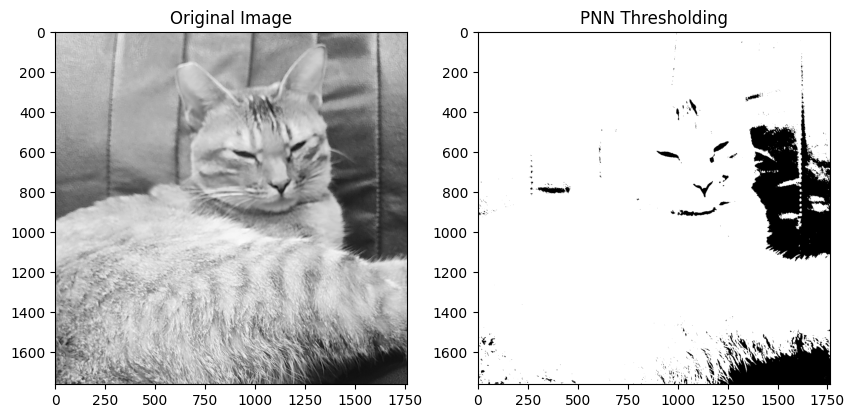

Optimal threshold value: 81.30277797618017


In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def compute_square_error(cluster1, cluster2):
    mean1, count1 = cluster1
    mean2, count2 = cluster2
    distance = euclidean(mean1, mean2)
    error = (distance ** 2) / (count1 * count2)
    return error

def pnn(image, num_clusters):
    # 計算影像的直方圖
    hist, bin_edges = np.histogram(image.flatten(), bins=256, range=[0, 256])
    
    # 初始化每個灰階值的群集
    clusters = [(np.array([i]), hist[i]) for i in range(256) if hist[i] > 0]
    
    while len(clusters) > num_clusters:
        min_error = float('inf')
        merge_pair = (0, 0)
        
        # 找出最小平方誤差的群集對
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                error = compute_square_error(clusters[i], clusters[j])
                if error < min_error:
                    min_error = error
                    merge_pair = (i, j)
        
        # 合併群集
        i, j = merge_pair
        mean_i, count_i = clusters[i]
        mean_j, count_j = clusters[j]
        
        new_mean = (mean_i * count_i + mean_j * count_j) / (count_i + count_j)
        new_count = count_i + count_j
        
        clusters[i] = (new_mean, new_count)
        del clusters[j]
    
    # 計算最佳閾值
    thresholds = [cluster[0] for cluster in clusters]
    threshold = np.mean(thresholds)
    
    return threshold

# 讀取影像
image = cv2.imread(r'F:\Code\Digtal-Image-Processing\Code\Resources\Data\LAB_CAT2.jpg', cv2.IMREAD_GRAYSCALE)

# 計算最佳閾值
threshold = pnn(image, num_clusters=2)

# 使用最佳閾值進行二值化
_, thresh_pnn = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)

# 顯示結果
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('PNN Thresholding')
plt.imshow(thresh_pnn, cmap='gray')

plt.show()

print(f"Optimal threshold value: {threshold}")